# Boosting - pulled apart and animated

This animated demo shows how the boosting algorithm works on a toy dataset and employing 1-dimensional stumps as a basis.  All of the updates are computed live as the animation runs.  

>The content of this notebook is supplementary material for the textbook Machine Learning Refined (Cambridge University Press, 2016). Visit http://www.mlrefined.com for free chapter downloads and tutorials, and [our Amazon site here](https://www.amazon.com/Machine-Learning-Refined-Foundations-Applications/dp/1107123526/ref=sr_1_1?ie=UTF8&qid=1474491657&sr=8-1&keywords=machine+learning+refined) for details regarding a hard copy of the text.

The basic boosting algorithm works by repeatedly fitting a tree-based basis element to a given dataset one-at-a-time, building up a proper representation in stages.  This is in contrast to the use of kernels and neural networks where all basis elements are fit to the dataset simultaneously.  You can learn more about the differences between trees, kernels, and neural networks, and trees and how they are applied to regression and classification problems by checking out the interactive jupyter notebook **5.1_nonlinear_machine_learning_v1.ipynb** located in this github repo.

Activating the next cell will start the demonstration - producing three panels that are updated as the algorithm progresses.  One tree is fit to the dataset at a time, and the weighted sum of these trees forms the complete regressor.  Here we are using depth-1 trees - otherwise known as stumps - and the animation shows how the optimal split point of each stump is chosen.  

The split point for a given stump is found by cycling through the dataset and testing the midpoint between each consecutive pair of points, with the branch value on either side taken as the average of the points on each side.  The fitness of this potential split point is given as the squared error between it and the current residual of the dataset - or in other words the difference between the dataset and the current regressor.  After all midpoints are tested the final split point for the current stump is chosen as the midpoint providing the smallest possible error, then this stump is added to the current regressor.  

A short description of each panel of the demo below is as follows.

- **left panel:** Here the toy dataset (in black) is shown along with the total learned regressor (in blue), which updates after the split point of each stump is found.


- **middle panel:** Here the residual of the dataset is shown (in blue), and as each stump is learned to the residual data the midpoint between each set of consecutive points is tested as a potential split.  The stump corresponding to each tested midpoint - with branch height equal to the average of the points on either side - is also illustrated for visualization purposes (in red) - as the search proceeds.  


-  **right panel:** As the search for the split point of each stump proceeds the squared error between each candidate and the residual is shown here.  After all tests are complete the split point for the current stump is chosen as the one giving the **smallest error** - and is highlighted after all tests are complete.


Once the animation completes all stages - the final state of each stage of learning a stump to the residual - are printed out for study.

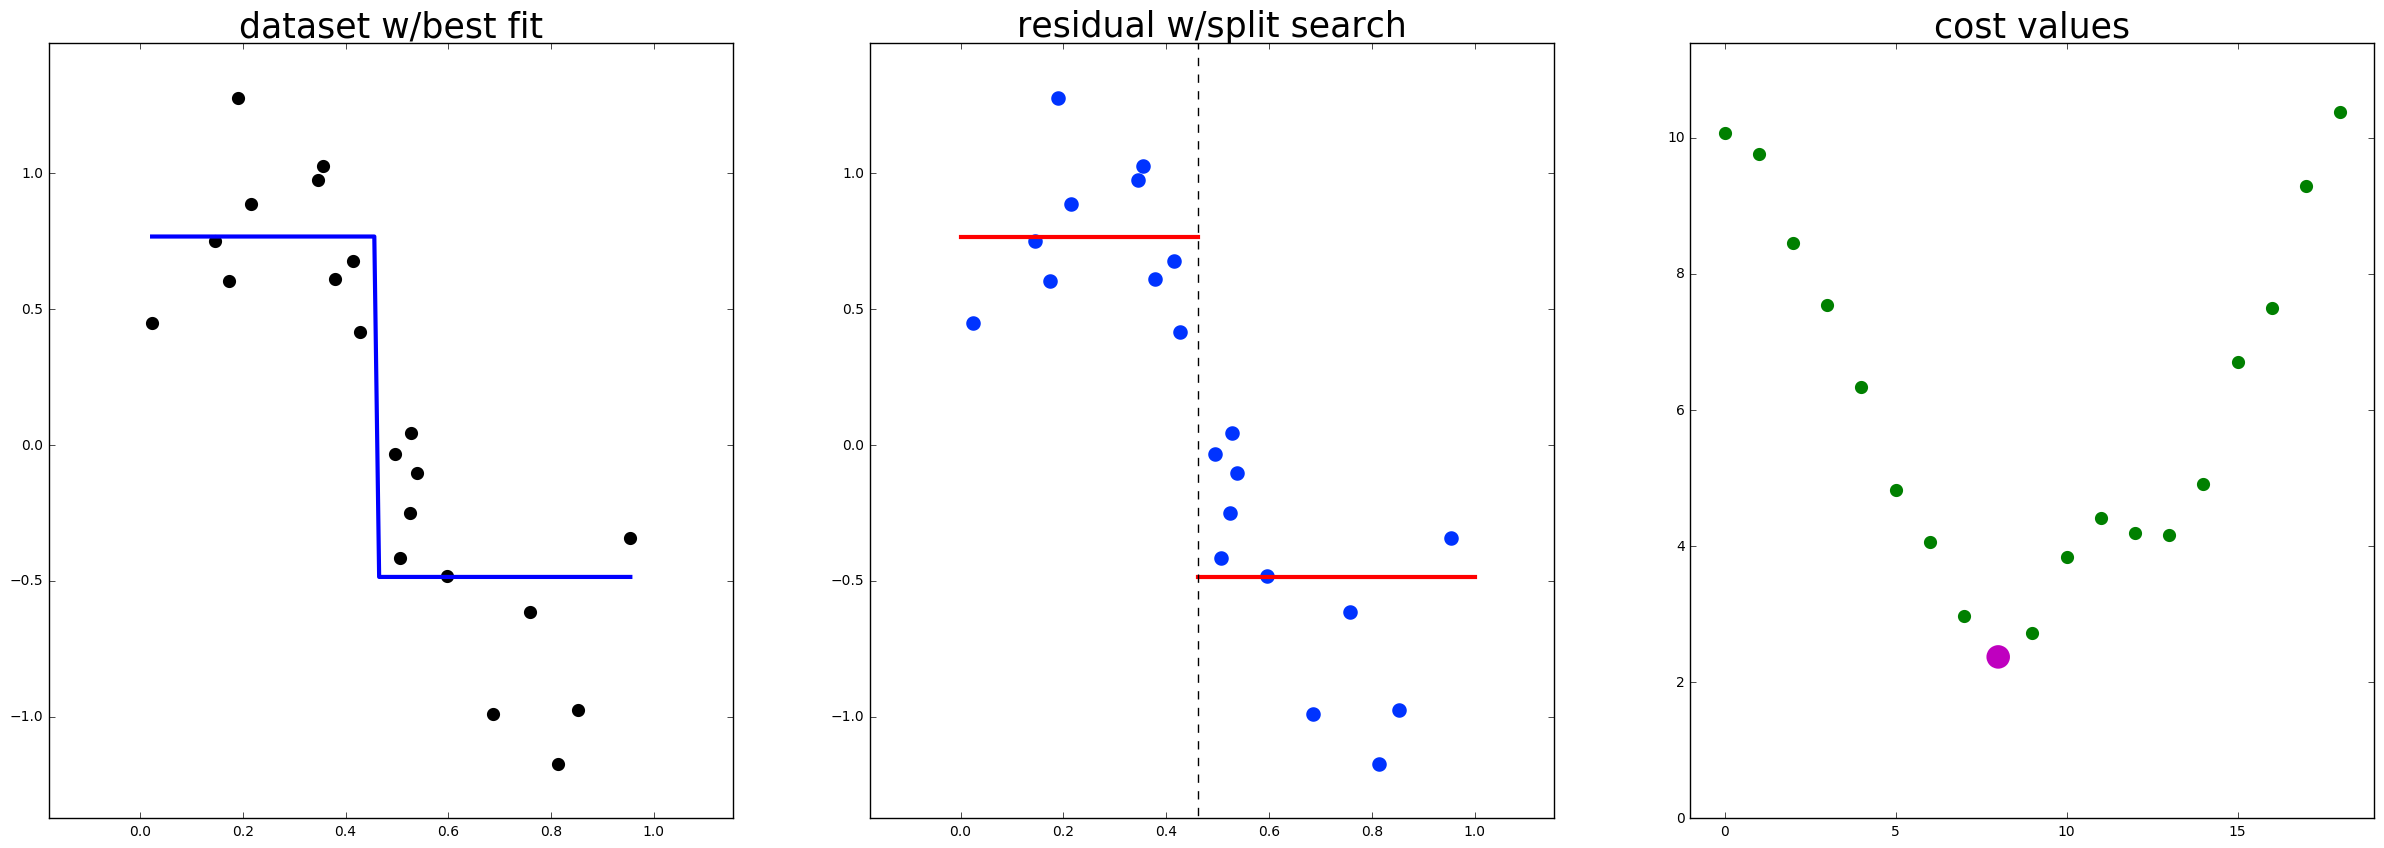

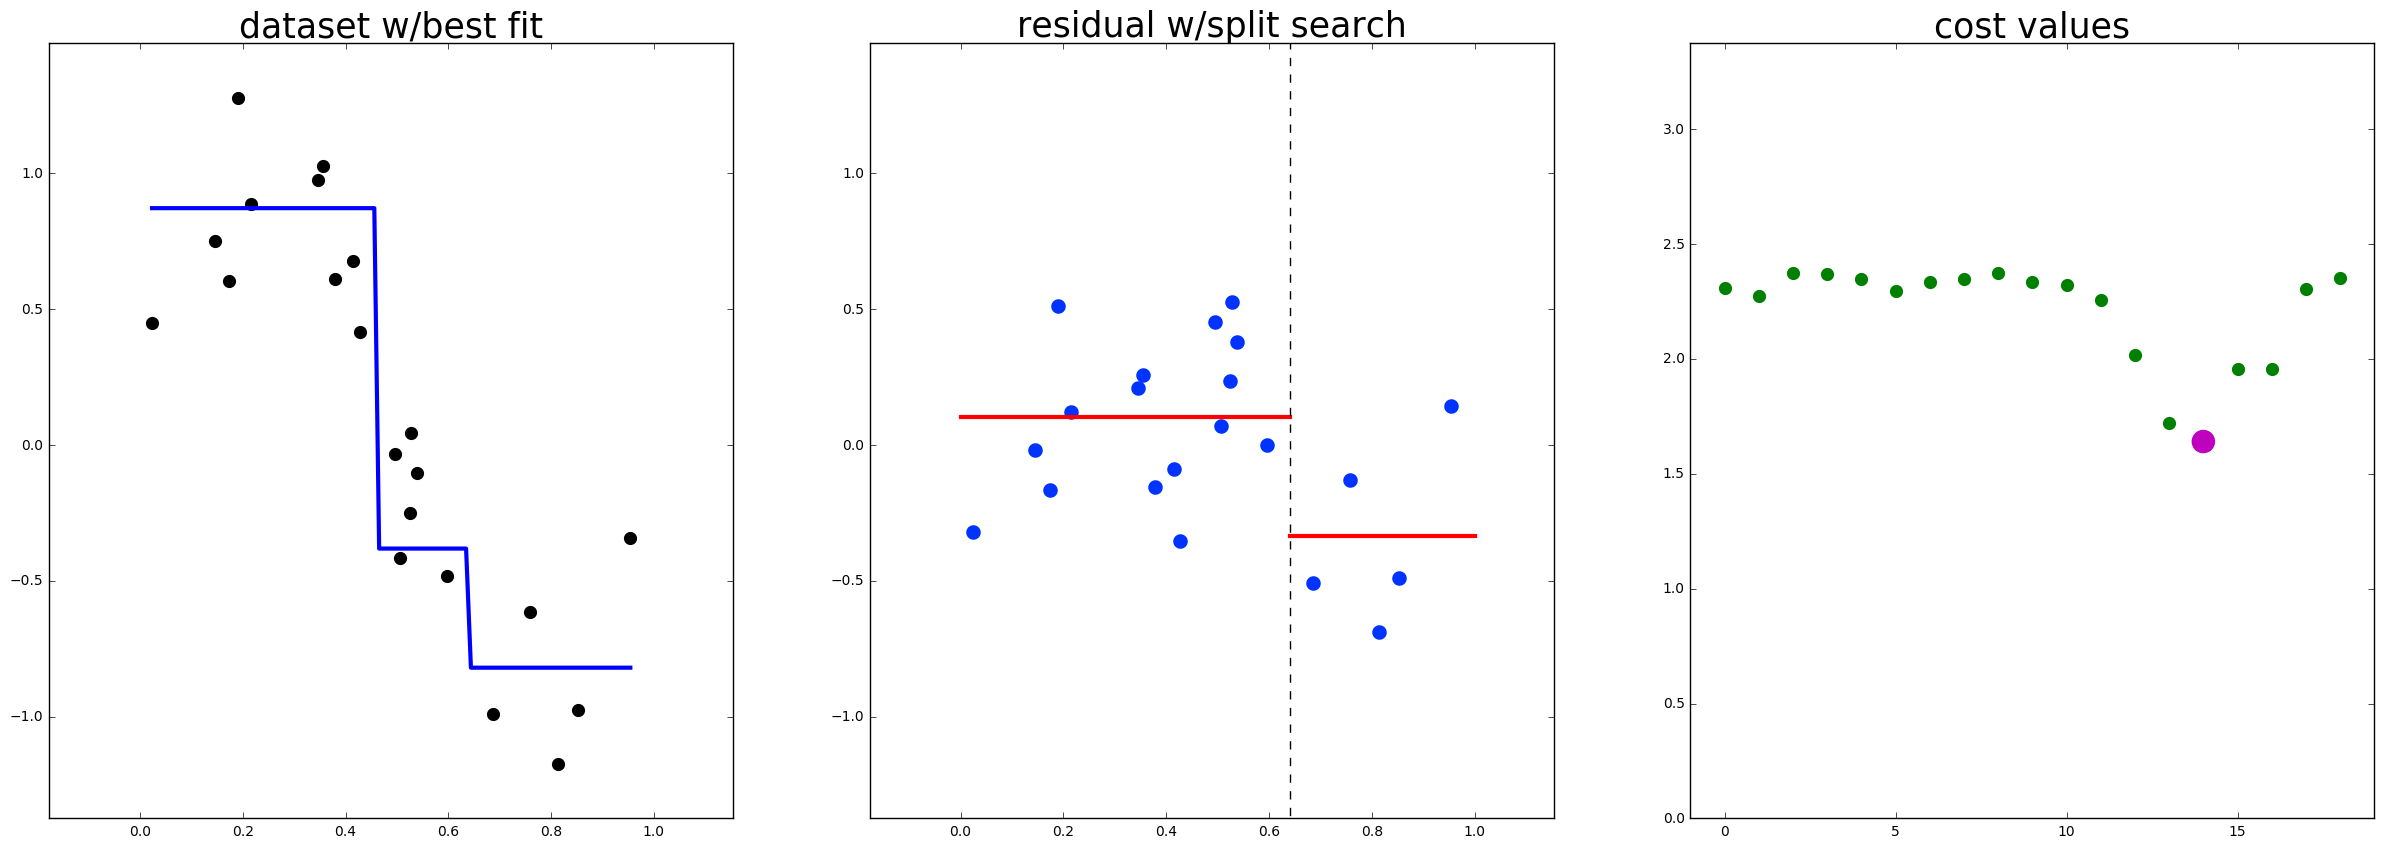

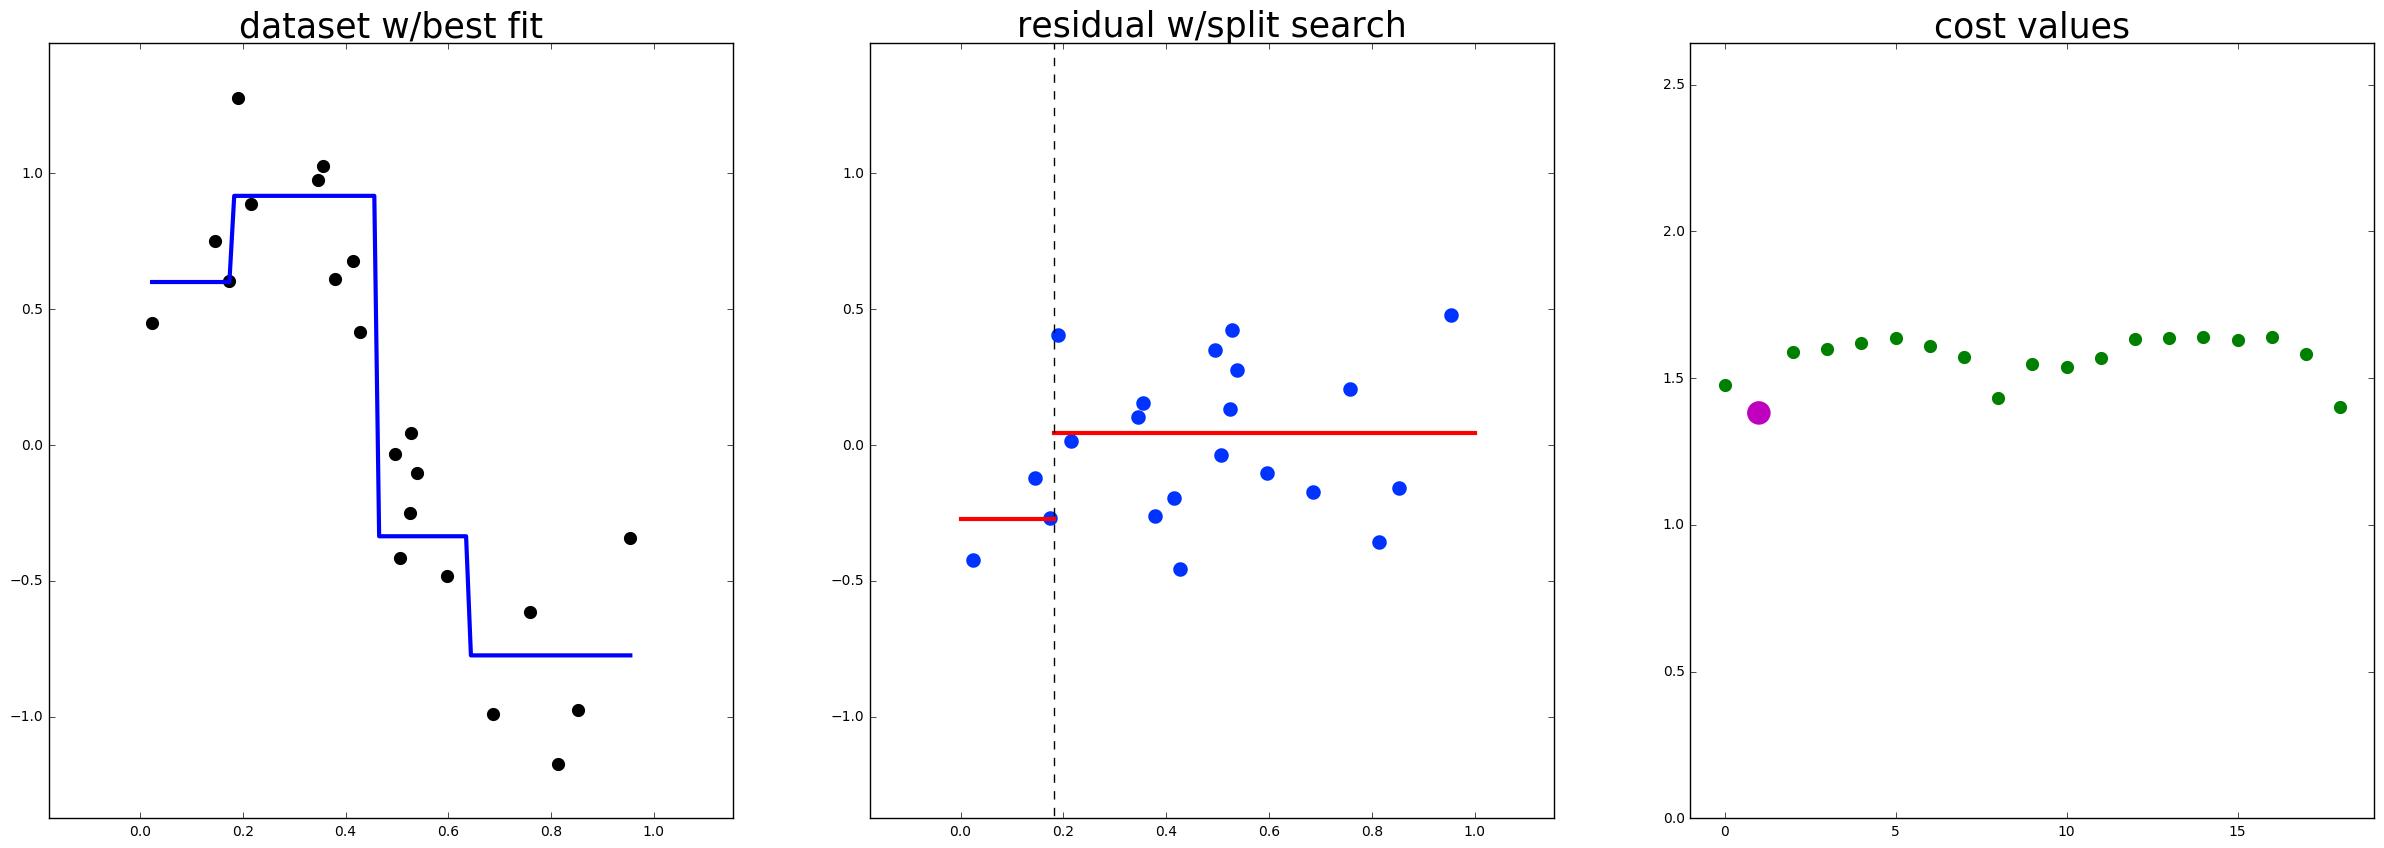

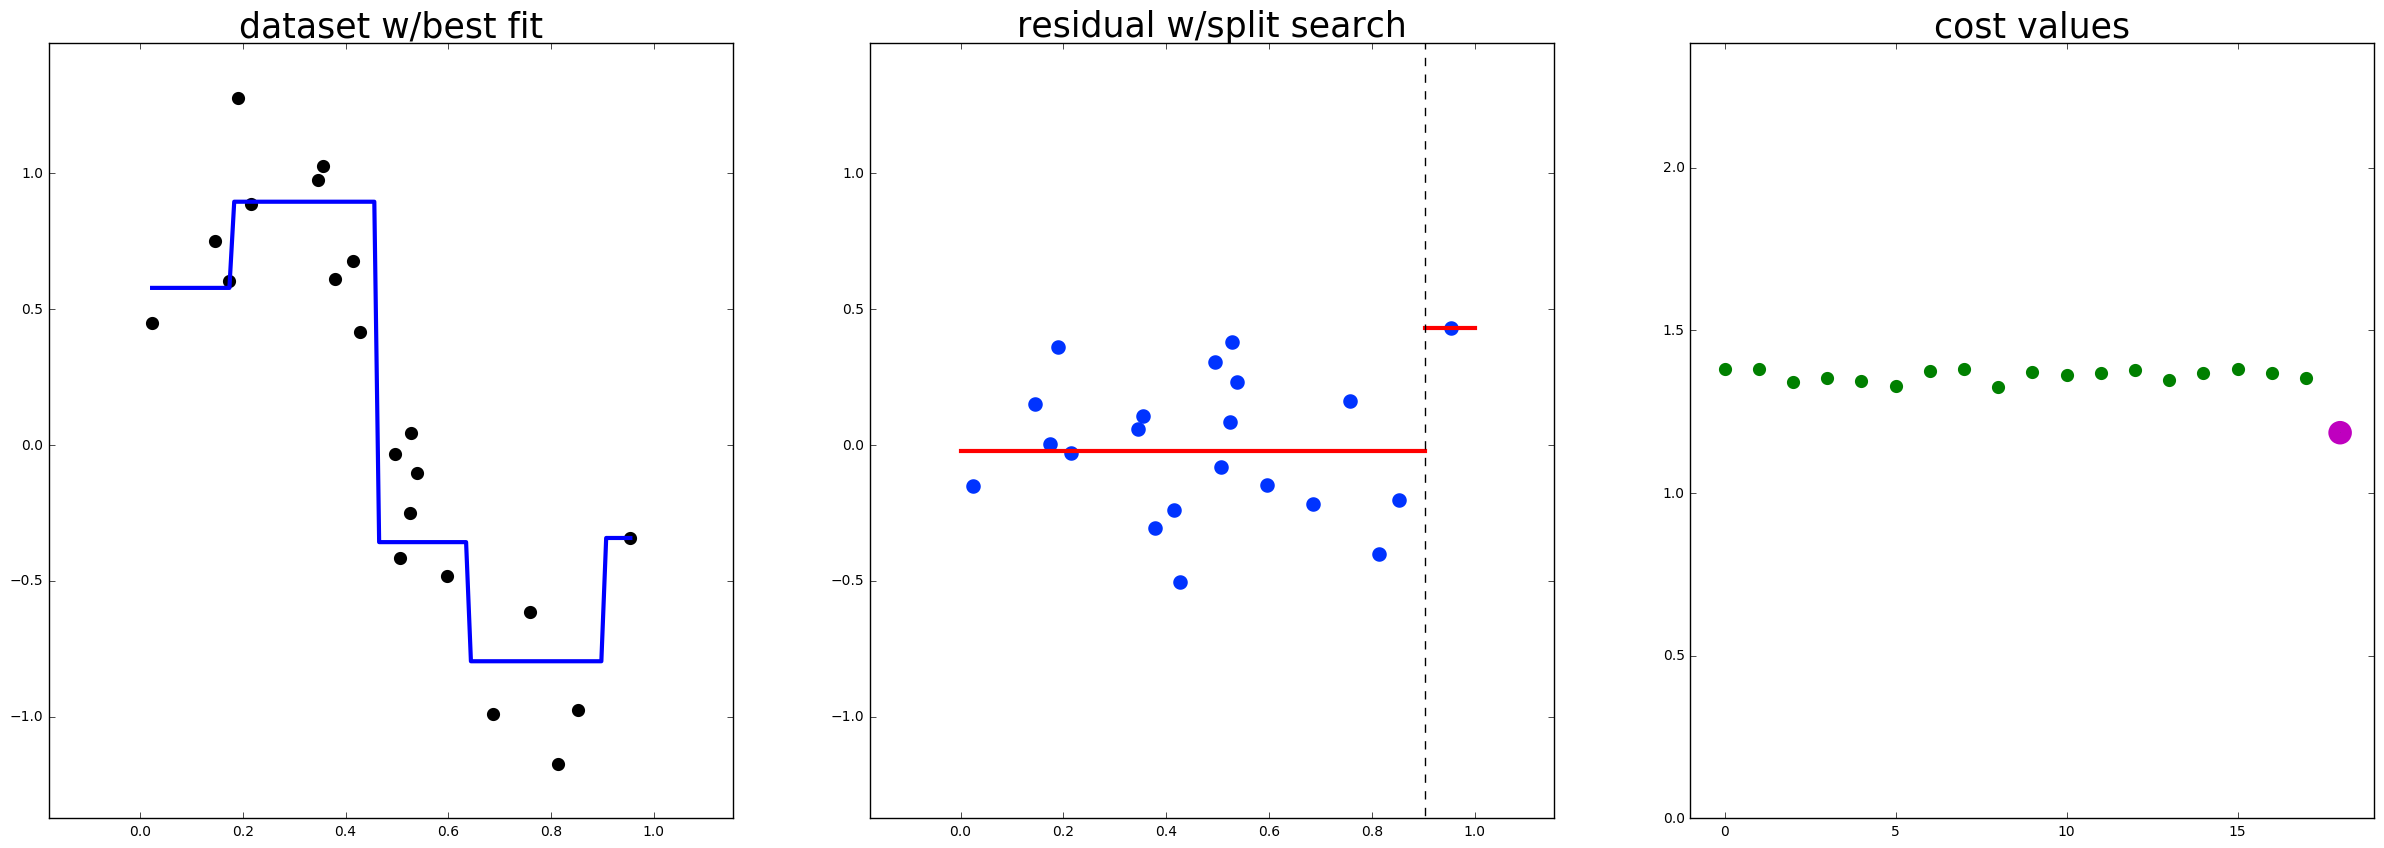

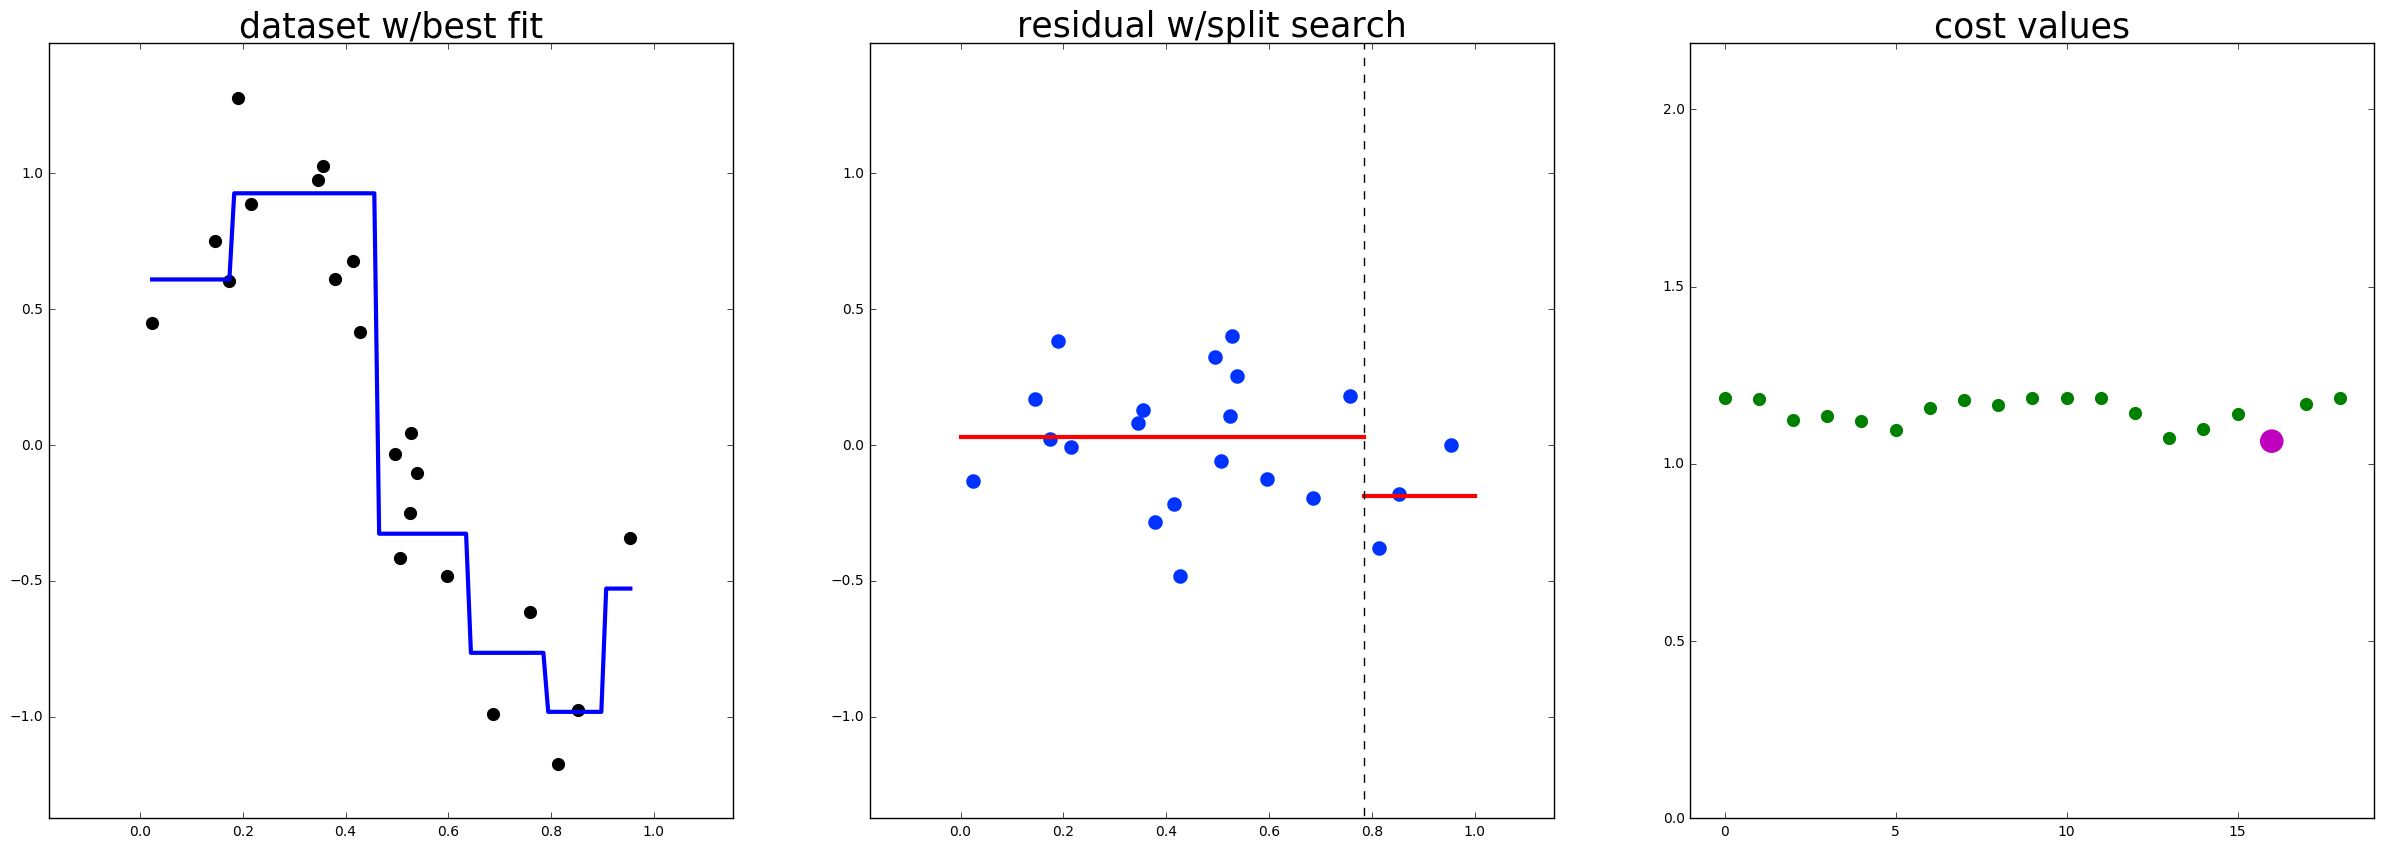

In [1]:
import sys
sys.path.append('demo_python_backend_files')
%matplotlib inline

from Boost_Demo import Boost_Demo
demo = Boost_Demo()
demo.load_data('demo_datasets/noisy_sin_sample.csv')
demo.show_splitpoint(num_trees = 5) # num_trees controls the number of stumps included in the final regressor

**Note:** in a professionally-designed boosting algorithm like the excellent [XGBoost](http://xgboost.readthedocs.io/en/latest/) the optimal split point for a each stump is not found by exhaustively searching through all possible midpoints - this would be very inefficient (especially for high dimensional datasets). Instead a [greedy - much faster - approach is employed to approximately find this optimal split point](http://xgboost.readthedocs.io/en/latest/model.html). 